Compare Text Analytics, NLP and Text Mining
Text mining also referred to as text analytics. Text mining is a process of exploring sizeable textual data and find patterns. Text Mining process the text itself, while NLP process with the underlying metadata. Finding frequency counts of words, length of the sentence, presence/absence of specific words is known as text mining. Natural language processing is one of the components of text mining. NLP helps identified sentiment, finding entities in the sentence, and category of blog/article. Text mining is preprocessed data for text analytics. In Text Analytics, statistical and machine learning algorithm used to classify information.

Tokenization is the first step in text analytics. The process of breaking down a text paragraph into smaller chunks such as words or sentence is called Tokenization. Token is a single entity that is building blocks for sentence or paragraph.

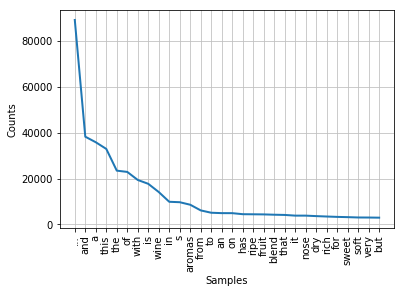

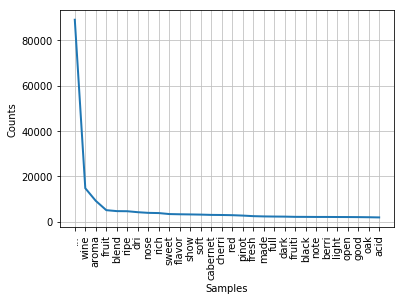

In [104]:
import plotly.plotly as py
from plotly.offline import download_plotlyjs, init_notebook_mode, plot,iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)
import pandas as pd
import string
import re

df = pd.read_csv("wine-reviews/winemag-data_first150k.csv")

#Loading NLTK
import nltk
#nltk.download('punkt')

df=df.dropna(subset=['price'])

df=df.drop_duplicates(['description'])
df=df.reset_index(drop=True)

df=df.fillna(-1)

df['description']= df['description'].str.lower()
df['description']= df['description'].apply(lambda elem: re.sub('[^a-zA-Z]',' ', elem))  
df['description']

from nltk.tokenize import word_tokenize
s = df.description.to_string()
s.lower()
s.translate(string.punctuation)
tokenized_word=word_tokenize(s)

from nltk.probability import FreqDist
fdist = FreqDist(tokenized_word)
#for each thing in the df we want to check the country ad thn get the description and then do the graph
# Frequency Distribution Plot
import matplotlib.pyplot as plt
fdist.plot(30,cumulative=False)
plt.show()

from nltk.corpus import stopwords
#nltk.download('stopwords')

stop_words=set(stopwords.words("english"))

filtered_sent=[]
for w in tokenized_word:
    if w not in stop_words:
        filtered_sent.append(w)
#print("Tokenized Sentence:",tokenized_word)
#print("Filterd Sentence:",filtered_sent)

from nltk.probability import FreqDist
fsdist = FreqDist(filtered_sent)

# Frequency Distribution Plot
#import matplotlib.pyplot as plt
#fsdist.plot(30,cumulative=False)
#plt.show()

# lexicon Normalisation - stemming
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize

ps = PorterStemmer()

stemmed_words=[]
for w in filtered_sent:
    stemmed_words.append(ps.stem(w))
    
import matplotlib.pyplot as plt
sdist = FreqDist(stemmed_words)
sdist.plot(30,cumulative=False)
plt.show()

KeyError: 'description'

In [81]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150930 entries, 0 to 150929
Data columns (total 11 columns):
Unnamed: 0     150930 non-null int64
country        150925 non-null object
description    150930 non-null object
designation    105195 non-null object
points         150930 non-null int64
price          137235 non-null float64
province       150925 non-null object
region_1       125870 non-null object
region_2       60953 non-null object
variety        150930 non-null object
winery         150930 non-null object
dtypes: float64(1), int64(2), object(8)
memory usage: 12.7+ MB


Lemmatization
Lemmatization reduces words to their base word, which is linguistically correct lemmas. It transforms root word with the use of vocabulary and morphological analysis. Lemmatization is usually more sophisticated than stemming. Stemmer works on an individual word without knowledge of the context. For example, The word "better" has "good" as its lemma. This thing will miss by stemming because it requires a dictionary look-up.

0.10571409609769047


In [ ]:
trace1 = go.Scatter(
                    x = index,
                    y = predictions,
                    mode = "lines+markers",
                    name = "price",
                    marker = dict(color = 'rgba(16, 112, 2, 0.8)'),
                    text= df.variety)

data = [trace1] #, trace2]
layout = dict(title = 'Points and Price vs ID of Top 100 Variety',
              xaxis= dict(title= 'ID',ticklen= 5,zeroline= False)
             )
fig = dict(data = data, layout = layout)
iplot(fig)